In [1]:
#Run this cell to install the necessary dependencies
import pandas as pd
import numpy as np
from datascience import *

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Project 2: Spotify

## Table of Contents
<a href='#section 0'>Background Knowledge: Topic</a>

1.  <a href='#section 1'> The Data Science Life Cycle</a>

    a. <a href='#subsection 1a'>Formulating a question or problem</a> 

    b. <a href='#subsection 1b'>Acquiring and cleaning data</a>

    c. <a href='#subsection 1c'>Conducting exploratory data analysis</a>

    d. <a href='#subsection 1d'>Using prediction and inference to draw conclusions</a>
<br><br>

### Background Knowledge <a id='section 0'></a>


If you listen to music, chances are you use Spotify, Apple Music, or another similar streaming service. This new era of the music industry curates playlists, recommends new artists, and is based on the number of streams more than the number of albums sold. The way these streaming services do this is (you guessed it) data!

Spotify, like many other companies, hire many full-time data scientists to analyze all the incoming user data and use it to make predictions and recommendations for users. If you're interested, feel free to check out [Spotify's Engineering Page](https://engineering.atspotify.com/) for more information!

<img src="images/spotify.png" width = 700/>

<center><a href=https://hrblog.spotify.com/2018/02/08/amping-up-diversity-inclusion-at-spotify/>Image Reference</a></center> 

# The Data Science Life Cycle <a id='section 1'></a>

## Formulating a Question or Problem <a id='subsection 1a'></a>
It is important to ask questions that will be informative and can be answered using the data. There are many different questions we could ask about music data. For example, there are many artists who want to find out how to get their music on Spotify's Discover Weekly playlist in order to gain exposure. Similarly, users love to see their *Spotify Wrapped* listening reports at the end of each year.

<div class="alert alert-warning">
<b>Question:</b> Recall the questions you developed with your group on Tuesday. Write down that question below, and try to add on to it with the context from the articles from Wednesday. Think about what data you would need to answer your question. You can review the articles on the bCourses page under Module 4.3.
   </div>

**Original Question(s):** *here*


**Updated Question(s):** *here*


**Data you would need:** *here*


## Acquiring and Cleaning Data <a id='subsection 1b'></a>

We'll be looking at song data from Spotify. You can find the raw data [here](https://github.com/rfordatascience/tidytuesday/tree/master/data/2020/2020-01-21). We've cleaned up the datasets a bit, and we will be investigating the popularity and the qualities of songs from this dataset.

The following table, `spotify`, contains a list of tracks identified by their unique song ID along with attributes about that track.

Here are the descriptions of the columns for your reference. (We will not be using all of these fields):

|Variable Name   | Description |
|--------------|------------|
|`track_id` | 	Song unique ID |
|`track_name` | Song Name |
|`track_artist	`| Song Artist |
|`track_popularity` | Song Popularity (0-100) where higher is better |
|`track_album_id`| Album unique ID |
|`track_album_name` | Song album name |
|`track_album_release_date`| Date when album released |
|`playlist_name`| Name of playlist |
|`playlist_id`| Playlist ID |
|`playlist_genre`| Playlist genre |
|`playlist_subgenre	`|  Playlist subgenre |
|`danceability`| Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable. |
|`energy`| Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy. |
|`key`| The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1. |
|`loudness`|  The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db. |
|`mode`|  Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0. |
|`speechiness`|  Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks. |
|`acousticness`|  A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic. |
|`instrumentalness`| Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0. |
|`liveness`| Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live. |
|`valence`| A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry). |
|`tempo`| The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration. |
|`duration_ms`| Duration of song in milliseconds |
|`creation_year`| Year when album was released |




In [2]:
spotify = Table.read_table('data/spotify.csv')
spotify.show(10)

track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,creation_year
6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxury Remix,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury Remix],2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.748,0.916,6,-2.634,1,0.0583,0.102,0,0.0653,0.518,122.036,194754,2019
0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.00421,0.357,0.693,99.972,162600,2019
1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.675,0.931,1,-3.432,0,0.0742,0.0794,2.33e-05,0.11,0.613,124.008,176616,2019
75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.718,0.93,7,-3.778,1,0.102,0.0287,9.43e-06,0.204,0.277,121.956,169093,2019
1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.65,0.833,1,-4.672,1,0.0359,0.0803,0,0.0833,0.725,123.976,189052,2019
7fvUMiyapMsRRxr07cU8Ef,Beautiful People (feat. Khalid) - Jack Wins Remix,Ed Sheeran,67,2yiy9cd2QktrNvWC2EUi0k,Beautiful People (feat. Khalid) [Jack Wins Remix],2019-07-11,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.675,0.919,8,-5.385,1,0.127,0.0799,0,0.143,0.585,124.982,163049,2019
2OAylPUDDfwRGfe0lYqlCQ,Never Really Over - R3HAB Remix,Katy Perry,62,7INHYSeusaFlyrHSNxm8qH,Never Really Over (R3HAB Remix),2019-07-26,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.449,0.856,5,-4.788,0,0.0623,0.187,0,0.176,0.152,112.648,187675,2019
6b1RNvAcJjQH73eZO4BLAB,Post Malone (feat. RANI) - GATTÜSO Remix,Sam Feldt,69,6703SRPsLkS4bPtMFFJes1,Post Malone (feat. RANI) [GATTÜSO Remix],2019-08-29,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.542,0.903,4,-2.419,0,0.0434,0.0335,4.83e-06,0.111,0.367,127.936,207619,2019
7bF6tCO3gFb8INrEDcjNT5,Tough Love - Tiësto Remix / Radio Edit,Avicii,68,7CvAfGvq4RlIwEbT9o8Iav,Tough Love (Tiësto Remix),2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.594,0.935,8,-3.562,1,0.0565,0.0249,3.97e-06,0.637,0.366,127.015,193187,2019
1IXGILkPm0tOCNeq00kCPa,If I Can't Have You - Gryffin Remix,Shawn Mendes,67,4QxzbfSsVryEQwvPFEV5Iu,If I Can't Have You (Gryffin Remix),2019-06-20,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.642,0.818,2,-4.552,1,0.032,0.0567,0,0.0919,0.59,124.957,253040,2019


<div class="alert alert-info">
<b>Question:</b> It's important to evalute our data source. What do you know about the source? What motivations do they have for collecting this data? What data is missing?
   </div>

*Insert answer here*

<div class="alert alert-info">
<b>Question:</b> Do you see any missing (nan) values? Why might they be there?
   </div>

*Insert answer here*

<div class="alert alert-info">
<b>Question:</b> We want to learn more about the dataset. First, how many total rows are in this table? What does each row represent?
    
   </div>

In [3]:
total_rows = spotify.num_rows
total_rows

32833

*Insert answer here*

## Conducting Exploratory Data Analysis <a id='subsection 1c'></a>

Visualizations help us to understand what the dataset is telling us. We will be using bar charts, scatter plots, and line plots to try to answer questions like the following:
> What audio features make a song popular and which artists have these songs? How have features changed over time?

### Part 1: We'll start by looking at the length of songs using the `duration_ms` column.

Right now, the `duration` array contains the length of each song in milliseconds. However, that's not a common measurement when describing the length of a song - often, we use minutes and seconds. Using array arithmetic, we can find the length of each song in seconds and in minutes. There are 1000 milliseconds in a second, and 60 seconds in a minute. First, we will convert milliseconds to seconds.


In [5]:
#Access the duration column as an array.
duration = spotify.column("duration_ms")
duration

array([194754, 162600, 176616, ..., 210112, 367432, 337500])

In [6]:
#Divide the milliseconds by 1000
duration_seconds = duration / 1000
duration_seconds

array([194.754, 162.6  , 176.616, ..., 210.112, 367.432, 337.5  ])

In [7]:
#Now convert duration_seconds to minutes.
duration_minutes = duration_seconds / 60
duration_minutes 

array([3.2459    , 2.71      , 2.9436    , ..., 3.50186667, 6.12386667,
       5.625     ])

<div class="alert alert-info">
<b>Question:</b> How would we find the average duration (in minutes) of the songs in this dataset?
   </div>

In [8]:
avg_song_length_mins = np.mean(duration_minutes)
avg_song_length_mins

3.7633301937075503

Now, we can add in the duration for each song (in minutes) by adding a column to our `spotify` table called `duration_min`. Run the following cell to do so.

In [9]:
#This cell will add the duration in minutes column we just created to our dataset.
spotify = spotify.with_columns('duration_min', duration_minutes)
spotify

track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,creation_year,duration_min
6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxury Remix,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury Remix],2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.748,0.916,6,-2.634,1,0.0583,0.102,0,0.0653,0.518,122.036,194754,2019,3.2459
0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.00421,0.357,0.693,99.972,162600,2019,2.71
1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.675,0.931,1,-3.432,0,0.0742,0.0794,2.33e-05,0.11,0.613,124.008,176616,2019,2.9436
75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.718,0.93,7,-3.778,1,0.102,0.0287,9.43e-06,0.204,0.277,121.956,169093,2019,2.81822
1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.65,0.833,1,-4.672,1,0.0359,0.0803,0,0.0833,0.725,123.976,189052,2019,3.15087
7fvUMiyapMsRRxr07cU8Ef,Beautiful People (feat. Khalid) - Jack Wins Remix,Ed Sheeran,67,2yiy9cd2QktrNvWC2EUi0k,Beautiful People (feat. Khalid) [Jack Wins Remix],2019-07-11,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.675,0.919,8,-5.385,1,0.127,0.0799,0,0.143,0.585,124.982,163049,2019,2.71748
2OAylPUDDfwRGfe0lYqlCQ,Never Really Over - R3HAB Remix,Katy Perry,62,7INHYSeusaFlyrHSNxm8qH,Never Really Over (R3HAB Remix),2019-07-26,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.449,0.856,5,-4.788,0,0.0623,0.187,0,0.176,0.152,112.648,187675,2019,3.12792
6b1RNvAcJjQH73eZO4BLAB,Post Malone (feat. RANI) - GATTÜSO Remix,Sam Feldt,69,6703SRPsLkS4bPtMFFJes1,Post Malone (feat. RANI) [GATTÜSO Remix],2019-08-29,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.542,0.903,4,-2.419,0,0.0434,0.0335,4.83e-06,0.111,0.367,127.936,207619,2019,3.46032
7bF6tCO3gFb8INrEDcjNT5,Tough Love - Tiësto Remix / Radio Edit,Avicii,68,7CvAfGvq4RlIwEbT9o8Iav,Tough Love (Tiësto Remix),2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.594,0.935,8,-3.562,1,0.0565,0.0249,3.97e-06,0.637,0.366,127.015,193187,2019,3.21978
1IXGILkPm0tOCNeq00kCPa,If I Can't Have You - Gryffin Remix,Shawn Mendes,67,4QxzbfSsVryEQwvPFEV5Iu,If I Can't Have You (Gryffin Remix),2019-06-20,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.642,0.818,2,-4.552,1,0.032,0.0567,0,0.0919,0.59,124.957,253040,2019,4.21733


### Artist Comparison

Let's see if we can find any meaningful difference in the average length of song for different artists.

<div class="alert alert-success">
    <b>Note: </b>Now that we have the average duration for each song, you can compare average song length between two artists. Below is an example!
   </div>

In [10]:
sam_smith = spotify.where("track_artist", are.equal_to("Sam Smith"))
sam_smith

track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,creation_year,duration_min
0GfS3y8Jd7SHWd9R51s7Fo,Dancing With A Stranger (With Normani) - Cheat Codes Remix,Sam Smith,69,2LDzwN4iZ4qbSA32E9CG4Q,Dancing With A Stranger (With Normani) [Cheat Codes Remix],2019-03-08,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.746,0.557,1,-6.722,1,0.0542,0.103,0.0036,0.138,0.324,111.961,159404,2019,2.65673
6Qs4SXO9dwPj5GKvVOv8Ki,Dancing With A Stranger (with Normani),Sam Smith,87,1V9oE8bVilClrk5naqyyvL,Dancing With A Stranger (with Normani),2019-01-11,Dance Pop Tunes,4SdfG4cPG3skmTiQLozZGh,pop,dance pop,0.741,0.52,8,-7.513,1,0.0656,0.45,1.97e-06,0.222,0.347,102.998,171030,2019,2.8505
29MOOOmMRPeWyPwKQFoF5t,I Feel Love,Sam Smith,78,2DmVNmERvg6j9jZQbelNKu,I Feel Love,2019-11-01,TUNES DANCE AND POP,3arpkhoRWXEYbdCpVAIrRR,pop,dance pop,0.719,0.708,0,-7.418,1,0.0417,0.00645,0.201,0.064,0.256,126.015,254453,2019,4.24088
6b2RcmUt1g9N9mQ3CbjX2Y,How Do You Sleep?,Sam Smith,91,7baaCf70tVcUBL2bbkuXjo,How Do You Sleep?,2019-07-19,Pop - Pop UK - 2019 - Canadian Pop - 2019 - Pop,46Cl6dmeiylK6TRGXr7hHe,pop,post-teen pop,0.477,0.682,1,-4.931,0,0.0925,0.153,0,0.0763,0.345,110.567,202205,2019,3.37008
6Qs4SXO9dwPj5GKvVOv8Ki,Dancing With A Stranger (with Normani),Sam Smith,87,1V9oE8bVilClrk5naqyyvL,Dancing With A Stranger (with Normani),2019-01-11,Post Teen Pop,2Aud8PXoTGcyY5esHu4Aaz,pop,post-teen pop,0.741,0.52,8,-7.513,1,0.0656,0.45,1.97e-06,0.222,0.347,102.998,171030,2019,2.8505
6Qs4SXO9dwPj5GKvVOv8Ki,Dancing With A Stranger (with Normani),Sam Smith,87,1V9oE8bVilClrk5naqyyvL,Dancing With A Stranger (with Normani),2019-01-11,Electropop 2019,4Bi8VLtaSu0JILliif8lH6,pop,electropop,0.741,0.52,8,-7.513,1,0.0656,0.45,1.97e-06,0.222,0.347,102.998,171030,2019,2.8505
6b2RcmUt1g9N9mQ3CbjX2Y,How Do You Sleep?,Sam Smith,91,7baaCf70tVcUBL2bbkuXjo,How Do You Sleep?,2019-07-19,POPTIMISM,6lWMi4lPiiPwDqn8ZpeyAY,pop,indie poptimism,0.477,0.682,1,-4.931,0,0.0925,0.153,0,0.0763,0.345,110.567,202205,2019,3.37008
3n3b5WNEohHP7Ou4ndBo6b,Pray,Sam Smith,60,3gbmTgBJupHlQnao4t4RDP,Pray,2018-03-29,This Is Logic,37i9dQZF1DWTIuAboZgTMf,rap,hip hop,0.637,0.448,4,-7.968,0,0.0617,0.224,0,0.0887,0.224,87.919,221760,2018,3.696
6b2RcmUt1g9N9mQ3CbjX2Y,How Do You Sleep?,Sam Smith,91,7baaCf70tVcUBL2bbkuXjo,How Do You Sleep?,2019-07-19,2020 Hits & 2019 Hits – Top Global Tracks 🔥🔥🔥,4JkkvMpVl4lSioqQjeAL0q,latin,latin pop,0.477,0.682,1,-4.931,0,0.0925,0.153,0,0.0763,0.345,110.567,202205,2019,3.37008
6b2RcmUt1g9N9mQ3CbjX2Y,How Do You Sleep?,Sam Smith,91,7baaCf70tVcUBL2bbkuXjo,How Do You Sleep?,2019-07-19,2020 Hits & 2019 Hits – Top Global Tracks 🔥🔥🔥,4JkkvMpVl4lSioqQjeAL0q,latin,latin hip hop,0.477,0.682,1,-4.931,0,0.0925,0.153,0,0.0763,0.345,110.567,202205,2019,3.37008


In [11]:
sam_smith_mean = sam_smith.column("duration_min").mean()
sam_smith_mean

3.2958253333333327

In [12]:
#In this cell, choose an artist you want to look at.
artist_name = spotify.where("track_artist", "Kanye West").column("duration_min").mean()
artist_name

3.233848550724638

In [13]:
#In this cell, choose another artist you want to compare it to.
artist_name_2 = spotify.where("track_artist", "Justin Bieber").column("duration_min").mean()
artist_name_2

3.504469354838709

This exercise was just one example of how you can play around with data and answer questions.

### Top Genres and Artists
In this section, we are interested in the categorical information in our dataset, such as the playlist each song comes from or the genre. There are almost 33,000 songs in our dataset, so let's do some investigating. What are the most popular genres? We can figure this out by grouping by the playlist genre.

<div class="alert alert-info">
<b>Question:</b> How can we group our data by unique genres?
   </div>

In [15]:
genre_counts = spotify.group('playlist_genre')
genre_counts

playlist_genre,count
edm,6043
latin,5155
pop,5507
r&b,5431
rap,5746
rock,4951


<div class="alert alert-info">
<b>Question:</b> In our dataset, it looks like the most popular genre is EDM. Make a barchart below to show how the other genres compare.
   </div>

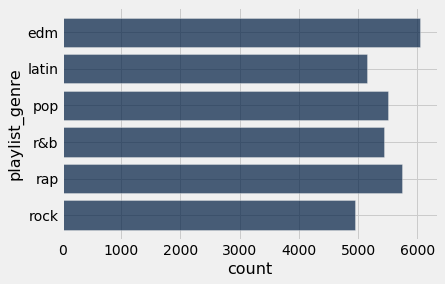

In [17]:
genre_counts.barh('playlist_genre', 'count')

Notice that it was difficult to analyze the above bar chart because the data wasn't sorted first. Let's sort our data and make a new bar chart so that it is much easier to make comparisons.

In [19]:
genre_counts_sorted = genre_counts.sort('count', descending = True)
genre_counts_sorted

playlist_genre,count
edm,6043
rap,5746
pop,5507
r&b,5431
latin,5155
rock,4951


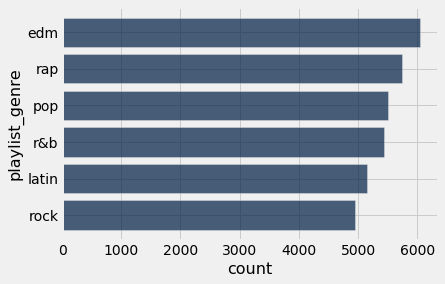

In [20]:
genre_counts_sorted.barh('playlist_genre', 'count')

<div class="alert alert-info">
<b>Question:</b> Was this what you expected? Which genre did you think would be the most popular?
   </div>

*Insert answer here.*

<div class="alert alert-info">
<b>Question:</b> Let's take a look at all the artists in the dataset. We can take a look at the top 25 artists based on the number of songs they have in our dataset. We'll follow a similar method as we did when grouping by genre above. First, we will group our data by artist and sort by count.
   </div>

In [21]:
#Here, we will group and sort in the same line.

artists_grouped = spotify.group('track_artist').sort('count', descending=True)
artists_grouped

track_artist,count
Martin Garrix,161
Queen,136
The Chainsmokers,123
David Guetta,110
Don Omar,102
Drake,100
Dimitri Vegas & Like Mike,93
Calvin Harris,91
Hardwell,84
Kygo,83


In [22]:
top_artists = artists_grouped.take(np.arange(0, 25))
top_artists

track_artist,count
Martin Garrix,161
Queen,136
The Chainsmokers,123
David Guetta,110
Don Omar,102
Drake,100
Dimitri Vegas & Like Mike,93
Calvin Harris,91
Hardwell,84
Kygo,83


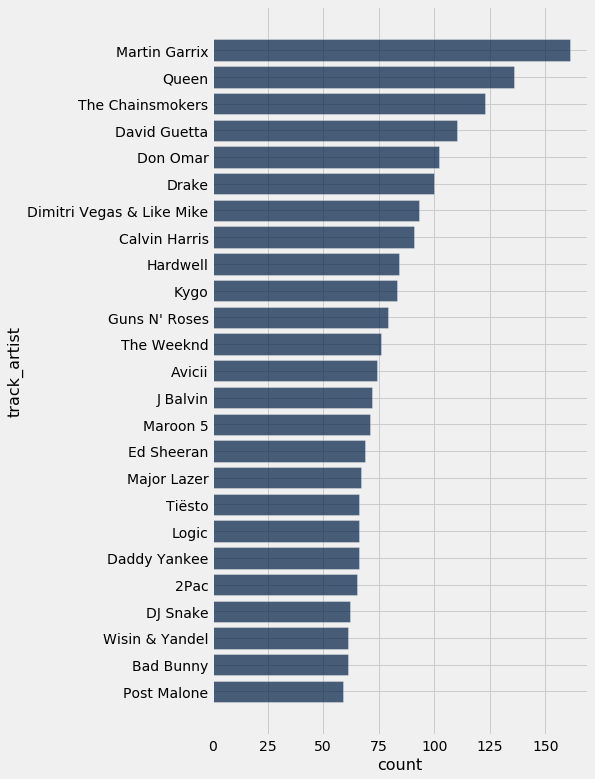

In [23]:
top_artists.barh('track_artist', 'count')

<div class="alert alert-info">
<b>Question:</b> What do you notice about the top 25 artists in our dataset?
   </div>

*insert answer here*

### Playlist Popularity

In our dataset, each song is listed as belonging to a particular playlist, and each song is given a "popularity score", called the `track_popularity`. Using the `track_popularity`, we can calculate an *aggregate popularity* for each playlist, which is just the sum of all the popularity scores for the songs on the playlist.

In order to create this aggregate popularity score, we need to group our data by playlist, and sum all of the popularity scores. First, we will create a subset of our `spotify` table using the `select` method. This lets us create a table with only the relevant columns we want. In this case, we only care about the name of the playlist and the popularity of each track. Keep in mind that each row still represents one track, even though we no longer have the track title in our table.

In [24]:
spotify_subset = spotify.select(['playlist_name', 'track_popularity'])
spotify_subset

playlist_name,track_popularity
Pop Remix,66
Pop Remix,67
Pop Remix,70
Pop Remix,60
Pop Remix,69
Pop Remix,67
Pop Remix,62
Pop Remix,69
Pop Remix,68
Pop Remix,67


<div class="alert alert-success">
<b>Note:</b> By grouping, we can get the number of songs from each playlist.
   </div>

In [25]:
playlists = spotify_subset.group('playlist_name')
playlists

playlist_name,count
"""Permanent Wave""",23
10er Playlist,61
1987-1997 OLD SKOOL JAMZ,41
2000's hard rock,45
2010 - 2011 - 2012 - 2013 - 2014 - 2015 - 2016 - 2017 - ...,83
2011-2014 House,96
2015 songs,91
2019 in Indie Poptimism,98
2020 Hits & 2019 Hits – Top Global Tracks 🔥🔥🔥,247
3rd Coast Classics,37


<div class="alert alert-info">
    <b>Question:</b> We can use the <code>group</code> method again, this time passing in a second argument <code>collect</code>, which says that we want to take the sum rather than the count when grouping. This results in a table with the total aggregate popularity of each playlist.
   </div>

In [26]:
#Run this cell.
total_playlist_popularity = spotify_subset.group('playlist_name', collect = sum)
total_playlist_popularity

playlist_name,track_popularity sum
"""Permanent Wave""",849
10er Playlist,4234
1987-1997 OLD SKOOL JAMZ,1159
2000's hard rock,2255
2010 - 2011 - 2012 - 2013 - 2014 - 2015 - 2016 - 2017 - ...,5630
2011-2014 House,2742
2015 songs,6088
2019 in Indie Poptimism,5809
2020 Hits & 2019 Hits – Top Global Tracks 🔥🔥🔥,20547
3rd Coast Classics,587


Similar to when we found duration in minutes, we can once again use the `column` method to access just the `track_popularity sum` column, and add it to our playlists table using the `with_column` method.

In [27]:
agg_popularity = total_playlist_popularity.column('track_popularity sum')
playlists = playlists.with_column('aggregate_popularity', agg_popularity)
playlists

playlist_name,count,aggregate_popularity
"""Permanent Wave""",23,849
10er Playlist,61,4234
1987-1997 OLD SKOOL JAMZ,41,1159
2000's hard rock,45,2255
2010 - 2011 - 2012 - 2013 - 2014 - 2015 - 2016 - 2017 - ...,83,5630
2011-2014 House,96,2742
2015 songs,91,6088
2019 in Indie Poptimism,98,5809
2020 Hits & 2019 Hits – Top Global Tracks 🔥🔥🔥,247,20547
3rd Coast Classics,37,587


<div class="alert alert-info">
<b>Question:</b> Do you think that the most popular playlist would be the one with the highest aggregate_popularity score, or the one with the highest number of songs? We can sort our playlists table and compare the outputs.

In [29]:
playlists.sort('count', descending=True)

playlist_name,count,aggregate_popularity
Indie Poptimism,308,13107
2020 Hits & 2019 Hits – Top Global Tracks 🔥🔥🔥,247,20547
Permanent Wave,244,13261
Hard Rock Workout,219,8713
Ultimate Indie Presents... Best Indie Tracks of the 2010s,198,11840
Fitness Workout Electro | House | Dance | Progressive House,195,2319
Southern Hip Hop,189,7024
Charts 2020 🔥Top 2020🔥Hits 2020🔥Summer 2020🔥Pop 2020🔥Pop ...,189,12670
"Classic Rock 70s 80s 90s, Rock Classics - 70s Rock, 80s ...",182,5482
Urban Contemporary,170,8770


<div class="alert alert-info">
<b>Question:</b> Now sort by aggregate popularity.
   </div>

In [30]:
playlists.sort('aggregate_popularity', descending=True)

playlist_name,count,aggregate_popularity
2020 Hits & 2019 Hits – Top Global Tracks 🔥🔥🔥,247,20547
Permanent Wave,244,13261
Indie Poptimism,308,13107
Charts 2020 🔥Top 2020🔥Hits 2020🔥Summer 2020🔥Pop 2020🔥Pop ...,189,12670
Ultimate Indie Presents... Best Indie Tracks of the 2010s,198,11840
post teen pop,166,10434
Urban Contemporary,170,8770
Hard Rock Workout,219,8713
Dance Pop,138,8380
Pop - Pop UK - 2019 - Canadian Pop - 2019 - Pop,100,7913


Comparing these two outputs shows us that the "most popular playlist" depends on how we judge popularity. If we have a playlist that has only a few songs, but each of those songs are really popular, should that playlist be higher on the popularity rankings? By way of calculation, playlists with more songs will have a higher aggregate popularity, since more popularity values are being added together. We want a metric that will let us judge the actual quality and popularity of a playlist, not just how many songs it has.

In order to take into account the number of songs on each playlist, we can calculate the "average popularity" of each song on the playlist, or the proportion of aggregate popularity that each song takes up. We can do this by dividing `aggregate_popularity` by `count`. Remember, since the columns are just arrays, we can use array arithmetic to calculate these values.

In [31]:
#Run this cell to get the average.
avg_popularity = playlists.column('aggregate_popularity') / playlists.column('count')

In [32]:
#Now add it to the playlists table.
playlists = playlists.with_column('average_popularity', avg_popularity)
playlists

playlist_name,count,aggregate_popularity,average_popularity
"""Permanent Wave""",23,849,36.913
10er Playlist,61,4234,69.4098
1987-1997 OLD SKOOL JAMZ,41,1159,28.2683
2000's hard rock,45,2255,50.1111
2010 - 2011 - 2012 - 2013 - 2014 - 2015 - 2016 - 2017 - ...,83,5630,67.8313
2011-2014 House,96,2742,28.5625
2015 songs,91,6088,66.9011
2019 in Indie Poptimism,98,5809,59.2755
2020 Hits & 2019 Hits – Top Global Tracks 🔥🔥🔥,247,20547,83.1862
3rd Coast Classics,37,587,15.8649


Let's see if our "most popular playlist" changes when we judge popularity by the average popularity of the songs on a playlist.

In [33]:
playlists.sort('average_popularity', descending=True)

playlist_name,count,aggregate_popularity,average_popularity
2020 Hits & 2019 Hits – Top Global Tracks 🔥🔥🔥,247,20547,83.1862
RapCaviar,50,3985,79.7
Most Popular 2020 TOP 50,48,3808,79.3333
Pop - Pop UK - 2019 - Canadian Pop - 2019 - Pop,100,7913,79.13
Baila Reggaeton,50,3885,77.7
Intro to Post-Teen Pop,16,1239,77.4375
Todo Éxitos,60,4610,76.8333
¡Viva Latino!,16,1223,76.4375
Mansión Reggaetón,27,2026,75.037
Global Top 50 | 2020 Hits,40,2963,74.075


Looking at the table above, we notice that 8/10 of the top 10 most popular playlists by the `average_popularity` metric are playlists with less than 100 songs. Just because a playlist has a lot of songs, or a high aggregate popularity, doesn't mean that the average popularity of a song on that playlist is high. Our new metric of `average_popularity` lets us rank playlists where the size of a playlist has no effect on it's overall score. We can visualize the top 25 playlists by average popularity in a bar chart.

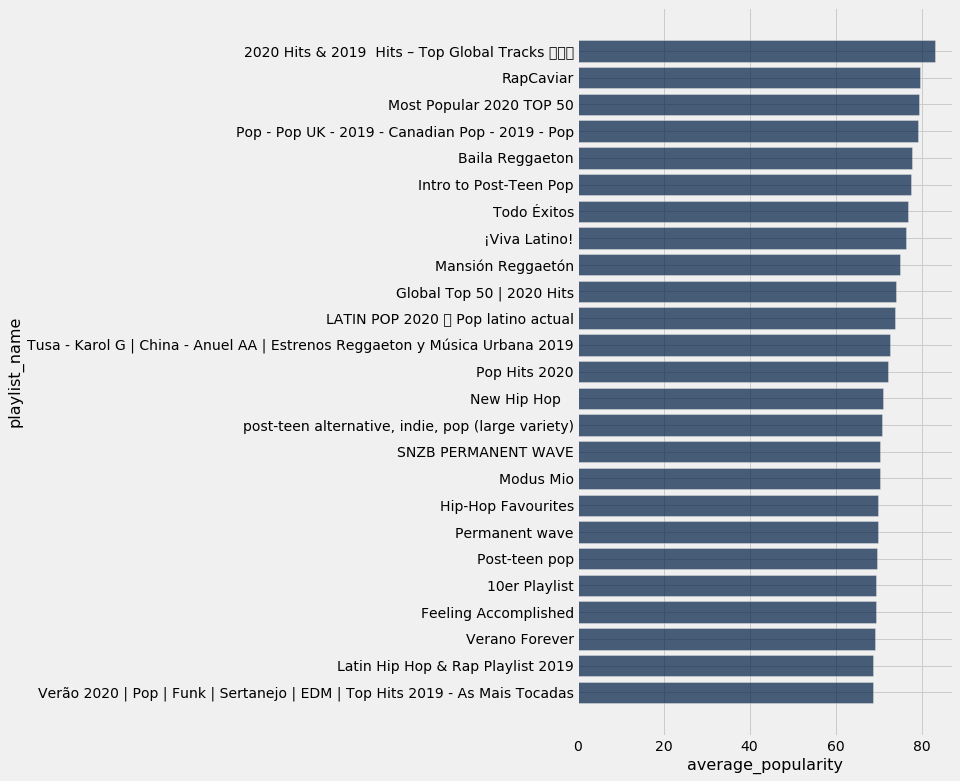

In [36]:
top_25_playlists = playlists.sort('average_popularity', descending=True).take(np.arange(25))
top_25_playlists.barh('playlist_name', 'average_popularity')

Creating a new metric like `average_popularity` helps us more accurately and fairly measure the popularity of a playlist. 

We saw before when looking at the top 25 artists that they were all male. Now looking at the top playlists, we see that the current landscape of popular playlists and music may have an effect on the artists that are popular. For example, the RapCaviar is the second most popular playlist, and generally there tends to be fewer female rap artists than male. This shows that the current landscape of popular music can affect the types of artists topping the charts.

## Using prediction and inference to draw conclusions <a id='subsection 1a'></a>

Now that we have some experience making these visualizations, let's go back to the visualizations others are working on to analyze Spotify data using more complex techniques.

[Streaming Dashboard](https://public.tableau.com/profile/vaibhavi.gaekwad#!/vizhome/Spotify_15858686831320/Dashboard1)

[Audio Analysis Visualizer](https://developer.spotify.com/community/showcase/spotify-audio-analysis/)

Music and culture are very intertwined so it's interesting to look at when songs are released and what is popular during that time. In this last exercise, you will be looking at the popularity of artists and tracks based on the dates you choose.

Let's look back at the first five rows of our `spotify` table once more.

In [37]:
spotify.show(5)

track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,creation_year,duration_min
6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxury Remix,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury Remix],2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.748,0.916,6,-2.634,1,0.0583,0.102,0,0.0653,0.518,122.036,194754,2019,3.2459
0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.00421,0.357,0.693,99.972,162600,2019,2.71
1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.675,0.931,1,-3.432,0,0.0742,0.0794,2.33e-05,0.11,0.613,124.008,176616,2019,2.9436
75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.718,0.93,7,-3.778,1,0.102,0.0287,9.43e-06,0.204,0.277,121.956,169093,2019,2.81822
1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.65,0.833,1,-4.672,1,0.0359,0.0803,0,0.0833,0.725,123.976,189052,2019,3.15087


<div class="alert alert-info">
    <b>Question:</b> Fill in the following cell the data according to the <code>creation_year</code> you choose.
   </div>

In [38]:
#Fill in the year as an integer.
by_year = spotify.where("creation_year", are.equal_to(2018))
by_year

track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,creation_year,duration_min
3TjLsDgL0bTbSQIF6M5Ki8,Say My Name (feat. Bebe Rexha & J Balvin) - Lucas & Stev ...,David Guetta,65,19z3vpbBT09lZ54neDfuFL,Say My Name (feat. Bebe Rexha & J Balvin) [Lucas & Steve ...,2018-12-28,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.678,0.747,10,-5.289,0,0.165,0.0395,0,0.174,0.516,120.002,189375,2018,3.15625
4YaU1EjXIkdRdkOI4cCZys,Signs - Eden Prince Remix,Starley,56,249wM0bMES3O4nFuwARq9i,Signs (Eden Prince Remix),2018-11-30,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.702,0.814,0,-7.51,0,0.0841,0.107,3.03e-05,0.374,0.503,121.993,172000,2018,2.86667
0Fc9QSMX6fgEBgDjUax7t7,Ruin My Life - Steve James Remix,Zara Larsson,58,6rWRg6yLGcLdG0IRaCB9LN,Ruin My Life (Remixes),2018-11-23,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.723,0.837,11,-6.487,1,0.0389,0.0103,0.000477,0.0834,0.643,123.952,177097,2018,2.95162
508lUjbGcPrL0CfvHC7UvI,Happier - Matt Medved Remix,Marshmello,59,44iw4l4Syoi5HZgCQzNSKJ,Happier (Remixes Pt. 2),2018-11-30,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.816,0.833,5,-5.972,1,0.0511,0.126,9.09e-06,0.0625,0.793,122.032,170164,2018,2.83607
7FDaS1k08rwMoAThmzUkOZ,Side Effects - Fedde Le Grand Remix,The Chainsmokers,63,3Yb3f9PL7aBpjuJPyiV0ot,Side Effects - Remixes,2018-07-25,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.633,0.854,0,-4.046,0,0.0432,0.0382,2.83e-05,0.434,0.659,126.026,172360,2018,2.87267
3Lv3frZVXU7Q0JEFvLIzWW,Promises (with Sam Smith) - David Guetta Remix,Calvin Harris,63,7g15PlMnaKmFMUsSpR8aZt,Promises (with Sam Smith) [Remixes],2018-10-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.588,0.697,3,-4.744,0,0.0372,0.186,0.000219,0.103,0.225,125.157,190417,2018,3.17362
6AZ21kPj2a0INgf3uCviVu,Beautiful (feat. Camila Cabello) - Bazzi vs. EDX's Ibiza ...,Bazzi vs.,56,6KGnQuHVrsfblNq0ekXp3y,Beautiful (feat. Camila Cabello) [Bazzi vs. EDX's Ibiza ...,2018-09-28,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.69,0.862,2,-4.154,1,0.0944,0.0611,1.85e-05,0.238,0.453,121.975,187869,2018,3.13115
6B9cqNooxIyPfr3P5EB8LA,Hearts Ain't Gonna Lie - Eden Prince Remix,Arlissa,65,00wIfIEWOqJ2RFrRazVl0i,"Hearts Ain't Gonna Lie (Remixes, Pt. 1)",2018-02-09,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.609,0.83,6,-3.759,0,0.0793,0.201,6.18e-05,0.0321,0.604,117.833,238451,2018,3.97418
5tAa8Uaqr4VvA3693mbIhU,Ruin My Life,Zara Larsson,79,2BM5FQCILC33Va2jOZ11Mu,Ruin My Life,2018-10-18,Dance Pop,37i9dQZF1DWZQaaqNMbbXa,pop,dance pop,0.665,0.699,11,-5.265,1,0.0578,0.423,0,0.0969,0.585,124.896,190932,2018,3.1822
18W92Zm1KjLCbUIszOhpkD,I Wanna Know (feat. Bea Miller),NOTD,74,2xqSl9X8ulJayI0KxABaLV,I Wanna Know (feat. Bea Miller),2018-03-16,Dance Pop,37i9dQZF1DWZQaaqNMbbXa,pop,dance pop,0.661,0.725,6,-4.859,1,0.0563,0.0253,0,0.123,0.605,119.927,197939,2018,3.29898


Based on the dataset you have now, use previous techniques to find the most popular song during that year. First group by what you want to look at, for example, artist/playlist/track.

In [39]:
your_grouped = by_year.group("playlist_name")
pop_track = your_grouped.sort("count", descending = True)
pop_track

playlist_name,count
Electropop 2019,72
House Electro 2019,63
Hip pop,62
Lush Lofi,58
Indie Poptimism,52
🔊BASSBOOSTED🔊⚡ELECTRO HOUSE⚡🔥EDM CAR MUSIC2018/2019🔥,51
PROJECT: Contemporary,51
LATIN FLOW MIX - Música Cristiana🎵,48
Christian Dance Party,47
Lofi Hip-Hop,46


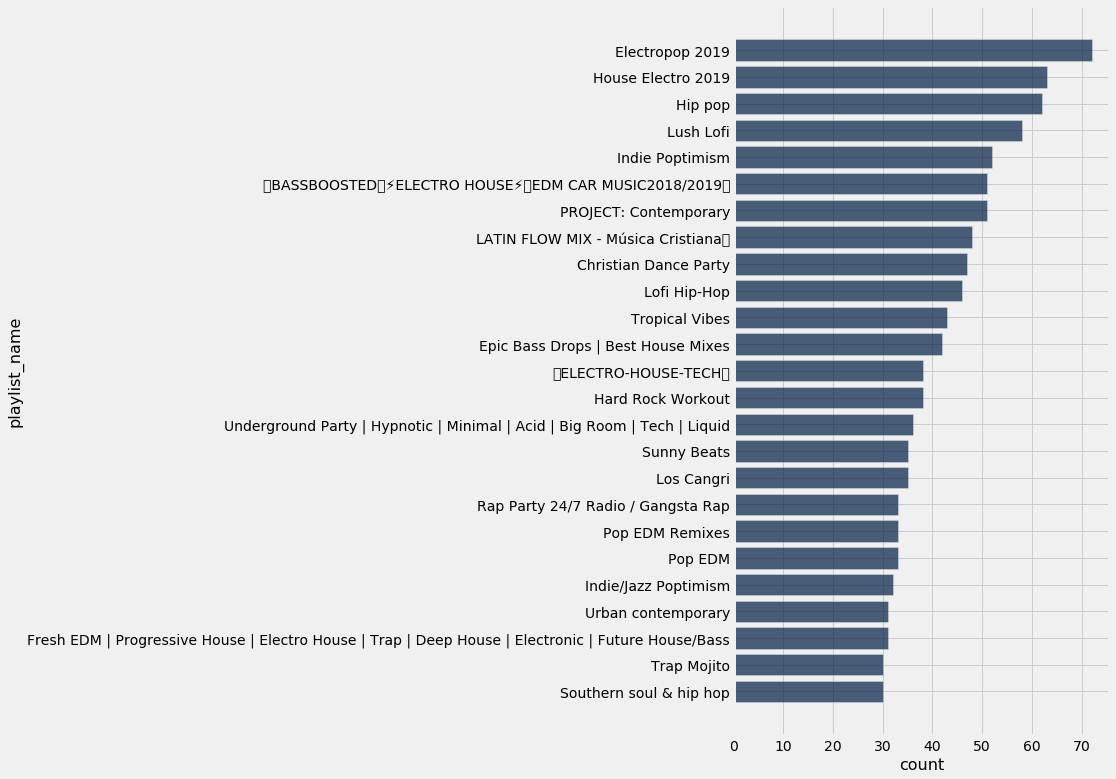

In [41]:
pop_track.take(np.arange(25)).barh("playlist_name", "count")

<div class="alert alert-info">
<b>Question:</b> Finally, use this cell if you want to look at the popularity of a track released on a specific date. It's very similar to the process above.
   </div>

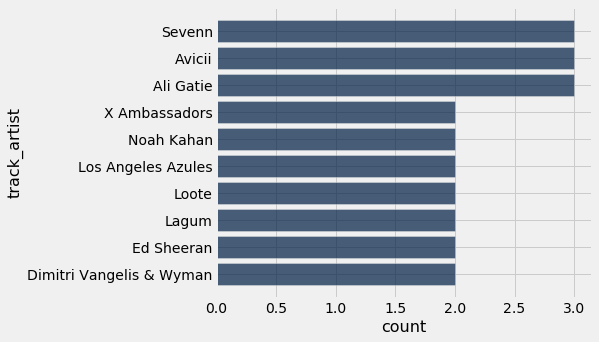

In [49]:
by_date = spotify.where("track_album_release_date", are.equal_to("2019-06-14"))
your_grouped = by_date.group("track_artist")
pop_track = your_grouped.sort("count", descending = True)
pop_track.take(np.arange(10)).barh("track_artist", "count")

<div class="alert alert-info">
<b>Question:</b> Tell us something interesting about this data.
   </div>

*Insert answer here.*

Notebook Authors: Alleanna Clark